# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# if Google Colab is being used
!pip install scikit-learn>=1.2.2 seaborn>=0.13.1 matplotlib>=3.7.1 numpy>=1.25.2 pandas>=1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import EDA Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
import seaborn as sns

sns.set()

import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plotly Setup: Render in both Colab and HTML export
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [ ]:
# Import Linear Regression Libraries

# Split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model using statsmodels
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# To compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Custom Color Set
ElleSet = [
    (102/255, 194/255, 165/255),  # Muted Green
    (214/255, 95/255, 95/255),    # Muted Red
    (141/255, 160/255, 203/255),  # Soft Blue
    (130/255, 198/255, 226/255),  # Muted Blue
    (166/255, 216/255, 84/255),   # Lime Green
    (230/255, 196/255, 148/255),  # Beige
    (179/255, 179/255, 179/255),  # Neutral Gray
    (255/255, 217/255, 47/255),    # Yellow
    (204/255, 153/255, 255/255),  # Soft lavender
    (255/255, 153/255, 204/255)   # Blush pink
]

# Function to apply ElleSet globally in Seaborn
def use_ElleSet():
    sns.set_palette(ElleSet)

In [ ]:
# Remove Future Warnings
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Supervised Learning/used_device_data.csv')

## Data Overview

### Dataset Initial Review

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Observations:**

* The dataset contains 15 columns describing various features of used devices, including brand name, screen size, battery capacity, release year, days used, and both normalized new and used prices.

In [ ]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


### Shape Check

In [ ]:
data.shape

(3454, 15)

**Observations:**

* The dataset contains information about a sample of 3,454 used devices.

### Feature Datatypes

In [ ]:
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**

* Most columns are appropriately typed, with numerical features stored as float64 or int64 and categorical variables as object. The 4g and 5g columns are currently stored as objects but represent binary indicators; they should be converted to numeric format to be used effectively as predictors in the regression model.

* Some columns contain missing values; further exploration is required to assess their significance and inform imputation or exclusion decisions.

* The target variable normalized_used_price is continuous and appropriate for linear regression modeling.

### Statistical Summary of Data

In [ ]:
data.describe().round(2)

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.00,3275.00,3452.00,3450.00,3450.00,3448.00,3447.00,3454.00,3454.00,3454.00,3454.00
mean,13.71,9.46,6.55,54.57,4.04,3133.40,182.75,2015.97,674.87,4.36,5.23
std,3.81,4.82,6.97,84.97,1.37,1299.68,88.41,2.30,248.58,0.59,0.68
min,5.08,0.08,0.00,0.01,0.02,500.00,69.00,2013.00,91.00,1.54,2.90
25%,12.70,5.00,2.00,16.00,4.00,2100.00,142.00,2014.00,533.50,4.03,4.79
50%,12.83,8.00,5.00,32.00,4.00,3000.00,160.00,2015.50,690.50,4.41,5.25
75%,15.34,13.00,8.00,64.00,4.00,4000.00,185.00,2018.00,868.75,4.76,5.67
max,30.71,48.00,32.00,1024.00,12.00,9720.00,855.00,2020.00,1094.00,6.62,7.85


**Observations:**

### Duplicate Values Review

In [ ]:
data.duplicated().sum()

np.int64(0)

**Observations:**

* No duplicate rows were found in the dataset, indicating that all entries are unique across all columns, including those with categorical (object) data.

### Missing Value Review

In [ ]:
data.isnull().sum().loc[lambda x: x > 0]

,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6
weight,7


In [ ]:
# Missing Value Summary
total_nulls = data.isnull().sum()
num_cols_with_nulls = (total_nulls > 0).sum()
total_null_values = total_nulls.sum()

print(f"{num_cols_with_nulls} columns contain missing values, with a total of {total_null_values} missing entries.")

6 columns contain missing values, with a total of 202 missing entries.


#Impute Missing Values

> Add blockquote

1.   List item
2.   List item





In [ ]:
# Impute Missing Values
data['main_camera_mp'] = data['main_camera_mp'].fillna(data['main_camera_mp'].median())

**Observations:**

* Six columns contained a total of 202 missing values, most of which appeared in numerical features such as main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight.
* These missing values have been imputed using the median of each respective column to ensure that the dataset remains complete for model fitting. Imputation was chosen over exclusion to preserve data integrity and avoid losing valuable observations

### Category Consistency Review

In [ ]:
# Review Category Consistency
# Identify object (categorical) columns
cat_cols = data.select_dtypes(include='object').columns

# Dictionary to collect results
category_summary = {}

# Check unique values and print for review
for col in cat_cols:
    unique_vals = data[col].value_counts(dropna=False)
    print(f"\n Unique values in '{col}':")
    print(unique_vals)
    category_summary[col] = len(unique_vals)

# Summary of category counts
print("\n Summary of Unique Categories per Column:")
for col, count in category_summary.items():
    print(f"- {col}: {count} unique values")


 Unique values in 'brand_name':
brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
BlackBerry     22
OnePlus        22
Microsoft      22
Coolpad        22
Google         15
Infinix        10
Name: count, dtype: int64

 Unique values in 'os':
os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

 Unique values in '4g':
4g
yes    2335
no     1119
Name: count, dtype: int64

 Unique values in '5g':
5g
no     3302
yes     152
Name: count, dtype: int64

 Summary of Unique Categories per Column:
-

**Observations:**

* All categorical columns (`brand_name`, `os`, `4g`, and `5g`) contain expected values with no visible typos, unexpected categories, or unusual entries.

### Normalized Value Review

In [ ]:
# Check for normalized values
for col in cat_cols:
    print(f"\n Normalized preview of '{col}':")
    print(data[col].astype(str).str.strip().str.lower().value_counts())


 Normalized preview of 'brand_name':
brand_name
others        502
samsung       341
huawei        251
lg            201
lenovo        171
zte           140
xiaomi        132
oppo          129
asus          122
alcatel       121
micromax      117
vivo          117
honor         116
htc           110
nokia         106
motorola      106
sony           86
meizu          62
gionee         56
acer           51
xolo           49
panasonic      47
realme         41
apple          39
lava           36
celkon         33
spice          30
karbonn        29
blackberry     22
oneplus        22
microsoft      22
coolpad        22
google         15
infinix        10
Name: count, dtype: int64

 Normalized preview of 'os':
os
android    3214
others      137
windows      67
ios          36
Name: count, dtype: int64

 Normalized preview of '4g':
4g
yes    2335
no     1119
Name: count, dtype: int64

 Normalized preview of '5g':
5g
no     3302
yes     152
Name: count, dtype: int64



**Observations:**

* Lowercasing and trimming whitespace revealed no inconsistencies in formatting; category values are clean and well-standardized.

### Copy of Dataset

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

###Feature: Normalized Used Price

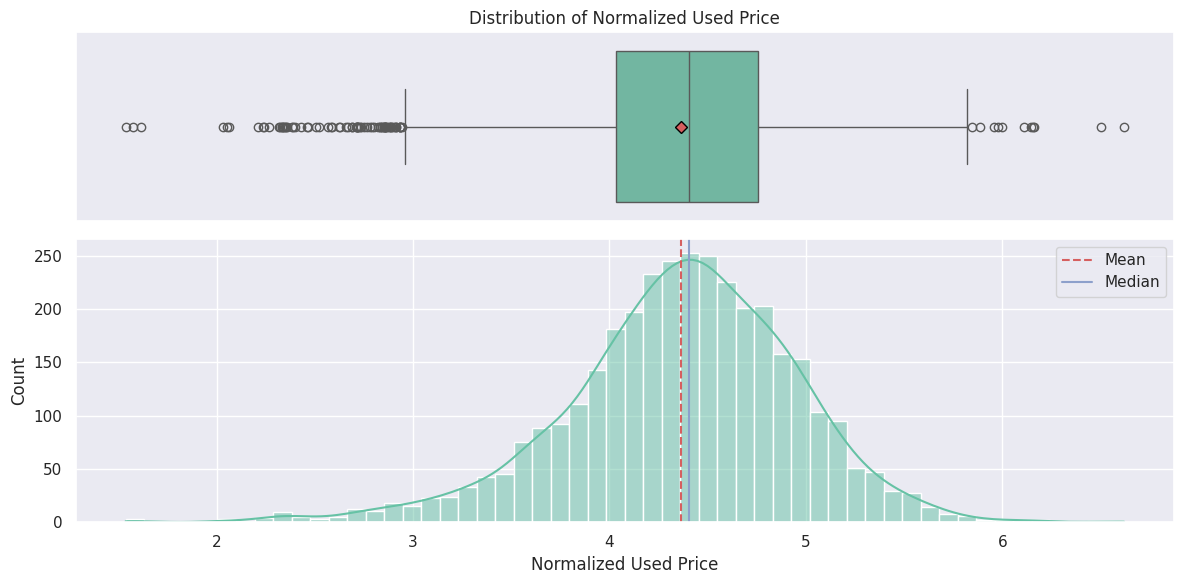

In [ ]:
# Shape of Distribution

# Calculate values
mean_val = df['normalized_used_price'].mean()
median_val = df['normalized_used_price'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['normalized_used_price'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Normalized Used Price')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['normalized_used_price'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Normalized Used Price')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()


**Observations:**

* The distribution of normalized used prices is approximately symmetric, with a slight right skew, indicating that most used devices fall within a common value range but a few high-value devices extend the upper tail.

* The mean and median are closely aligned, suggesting that pricing in the used market is relatively stable and not heavily influenced by extreme outliers.

* The central tendency around €4.3–€4.4 (normalized scale) reflects consistent resale value across mainstream devices, reinforcing predictability for price modeling.

* A small number of lower-priced devices may represent older or lower-spec models, while higher outliers could reflect recently released or lightly used premium-tier devices.

* The structure of the used price distribution supports linear modeling, as the range is well-behaved and does not require transformation at this stage.

###Feature: Normalized New Price

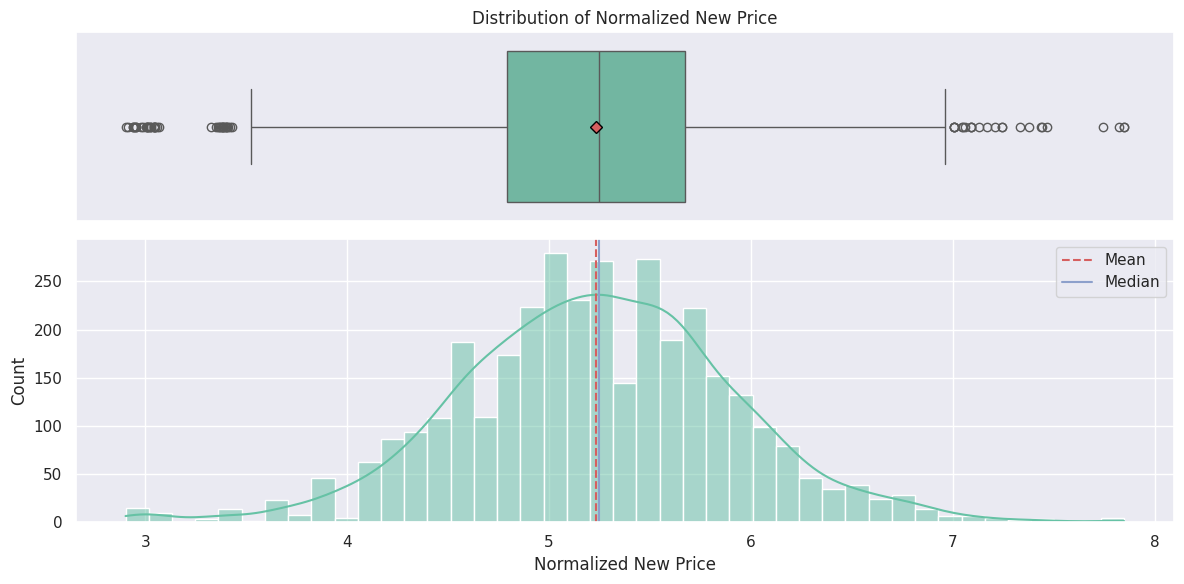

In [ ]:
#Shape of Distribution

# Calculate values
mean_val = df['normalized_new_price'].mean()
median_val = df['normalized_new_price'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['normalized_new_price'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Normalized New Price')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['normalized_new_price'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Normalized New Price')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The normalized new price distribution is bell-shaped but with a long left tail, suggesting that while most devices launch at similar price points, some budget models enter the market at significantly lower values.

* Mean and median are closely aligned, indicating relatively balanced pricing across the majority of devices at the time of release.

* The central clustering of new prices reflects market standardization, with manufacturers releasing a large volume of models within a predictable pricing band.

* Devices with significantly lower original prices could reflect entry-level models, which may show different depreciation patterns than mid- or high-tier devices.

* Understanding the relationship between new and used prices across this distribution will be critical for modeling value retention — one of the core business drivers for ReCell.

###Feature: Screen Size

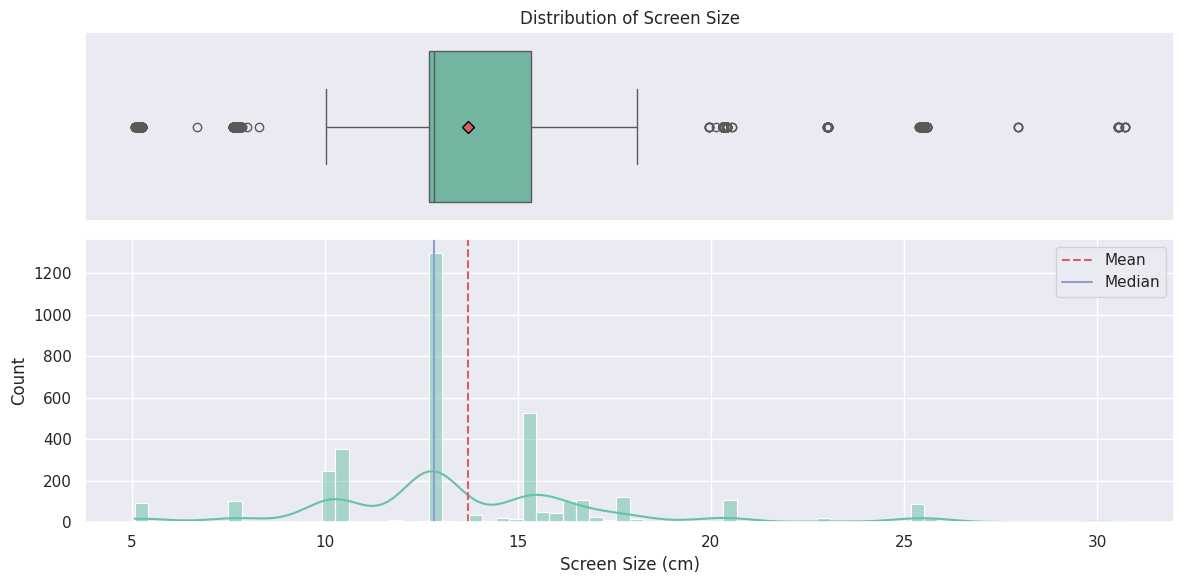

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['screen_size'].mean()
median_val = df['screen_size'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['screen_size'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Screen Size')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['screen_size'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Screen Size (cm)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution of screen size is right-skewed, with most devices clustered between 12 and 16 cm — indicating a dominance of standard smartphone dimensions in the used device market.

* Sharp spikes in the distribution suggest clustering around popular screen sizes, likely reflecting common model releases and consumer preferences.

* A small number of devices exceed 20 cm in screen size, likely representing tablets or specialty devices, which may follow different pricing dynamics.

* The mean and median screen sizes are close, indicating general symmetry in the core range, with mild skew introduced by larger-screen outliers.

* Segmenting by screen size may support differentiated pricing strategies, particularly for distinguishing between standard smartphones and larger form-factor devices such as tablets.



###Feature: Main Camera MP

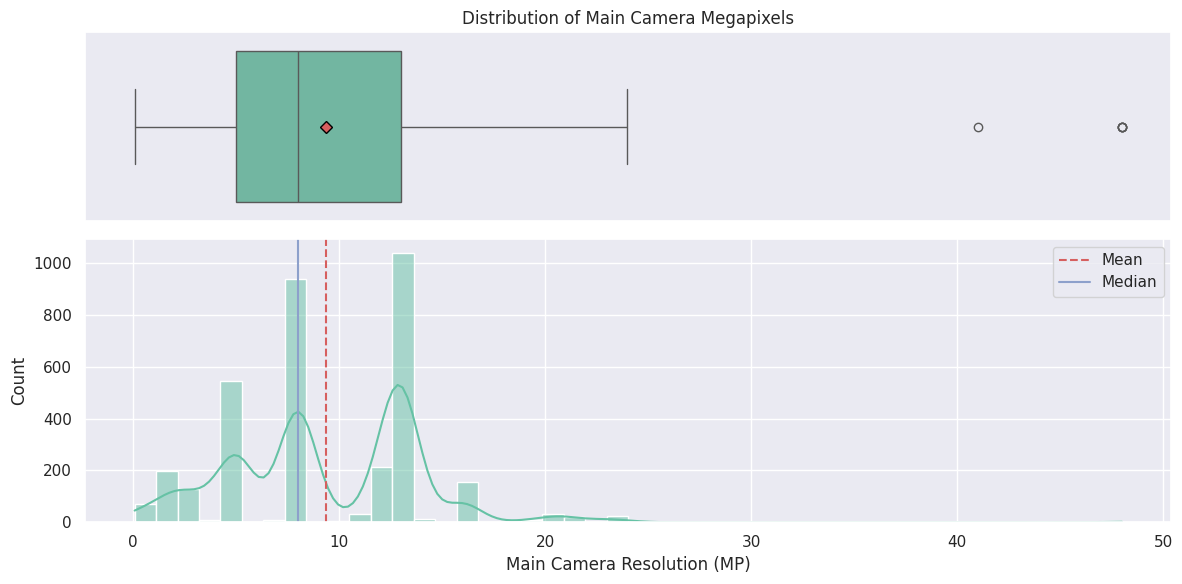

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['main_camera_mp'].mean()
median_val = df['main_camera_mp'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['main_camera_mp'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Main Camera Megapixels')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['main_camera_mp'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Main Camera Resolution (MP)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is not normal. It is right-skewed and multimodal, with most devices clustering around specific camera resolutions such as 8 MP, 12 MP, and 16 MP, indicating a concentration around standard-resolution smartphone models.

* The mean is slightly higher than the median, reflecting a modest skew caused by a smaller number of high-resolution camera models extending beyond 20 MP.

* There is visible multimodality, suggesting that certain megapixel values (e.g., 8 MP, 12 MP, 16 MP) correspond to popular models or manufacturing standards.

* A few high-resolution outliers (above 40 MP) likely reflect premium-tier or newer generation devices — these may carry higher resale value and could serve as useful predictors in pricing models.



###Feature: Selfie Camera MP

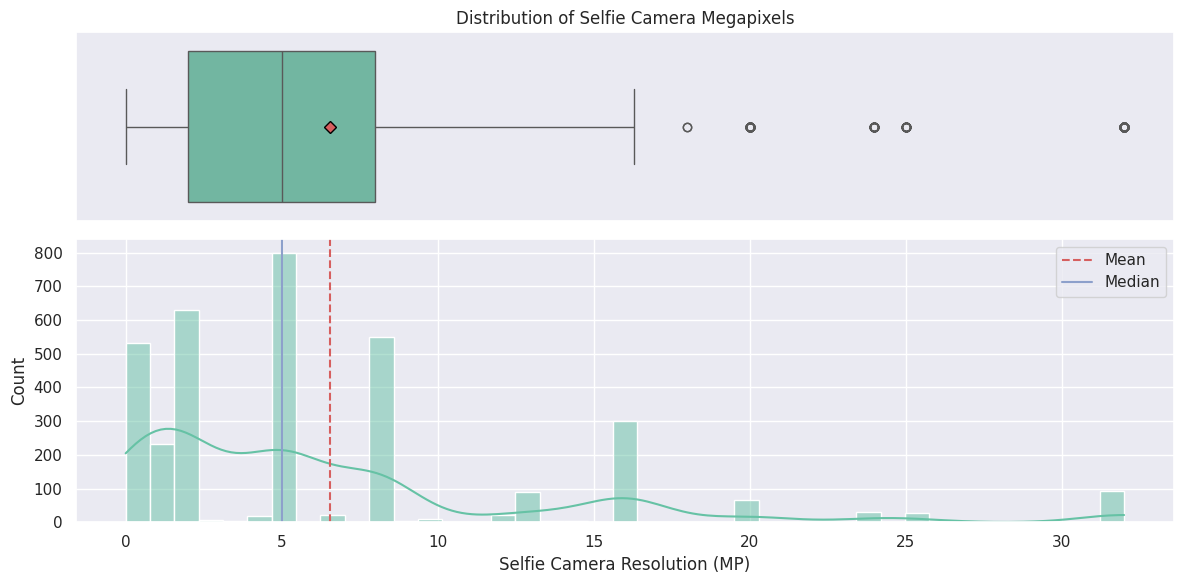

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['selfie_camera_mp'].mean()
median_val = df['selfie_camera_mp'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['selfie_camera_mp'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Selfie Camera Megapixels')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['selfie_camera_mp'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Selfie Camera Resolution (MP)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is strongly right-skewed and non-normal, with the majority of devices offering selfie cameras below 8 MP and a long tail extending beyond 30 MP.

* The mean is noticeably higher than the median, suggesting that a few high-resolution front-facing cameras are influencing the average, despite being relatively rare.

* Multiple sharp peaks suggest clustering around standard resolutions such as 2 MP, 5 MP, and 8 MP — likely reflecting device class or generation-specific design patterns.

* Outliers above 20 MP are uncommon and may indicate premium-tier models, potentially contributing to price prediction but requiring evaluation for leverage or undue influence in regression.

###Feature: Internal Memory

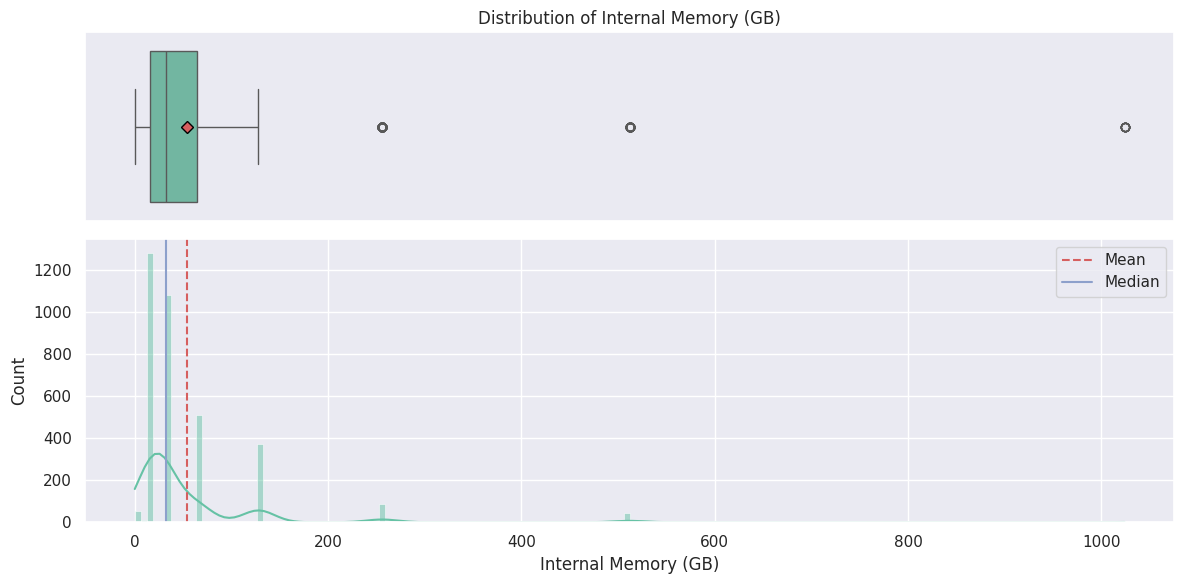

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['int_memory'].mean()
median_val = df['int_memory'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['int_memory'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Internal Memory (GB)')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['int_memory'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Internal Memory (GB)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is highly right-skewed and non-normal, with most devices offering internal memory between 16 GB and 128 GB, and a small number of extreme outliers extending up to 1,024 GB.

* The mean is significantly higher than the median, indicating that the few ultra-high-memory devices disproportionately pull the average upward.

* Distinct peaks around common storage sizes (e.g., 32 GB, 64 GB, 128 GB) suggest standardization across device generations — a pattern that may help categorize devices into pricing tiers.

* The extreme outliers (256 GB and above) may distort model behavior if not addressed, especially given the use of linear regression. Consider capping, transforming, or creating categorical bins during preprocessing.



###Feature: RAM

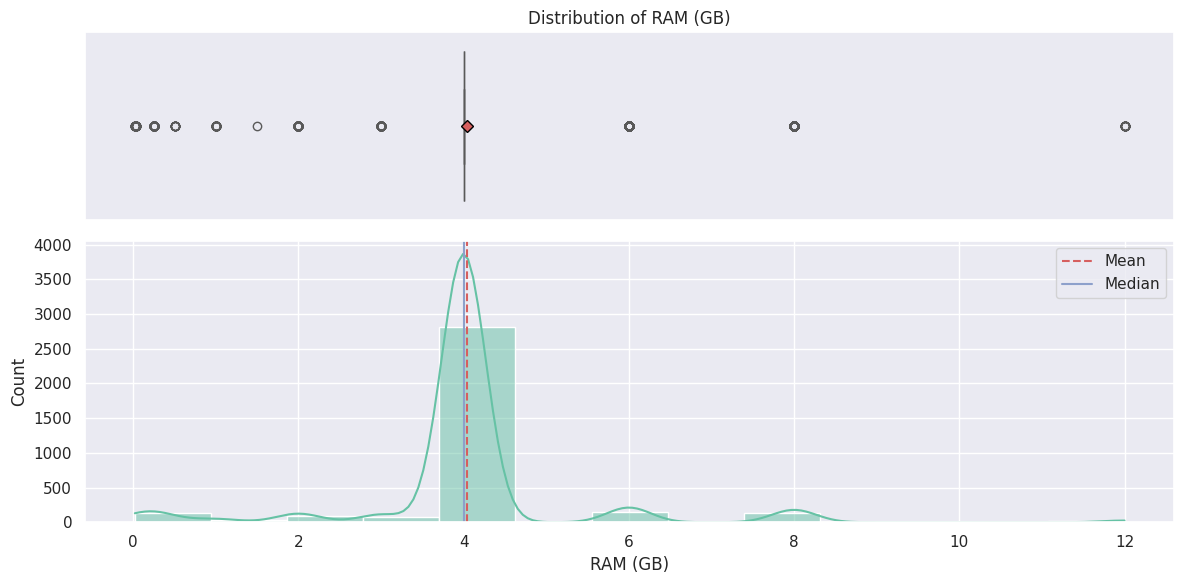

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['ram'].mean()
median_val = df['ram'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['ram'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of RAM (GB)')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['ram'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('RAM (GB)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* RAM is effectively constant across the majority of devices (4 GB), which limits its predictive value for price modeling.

###Feature: Weight

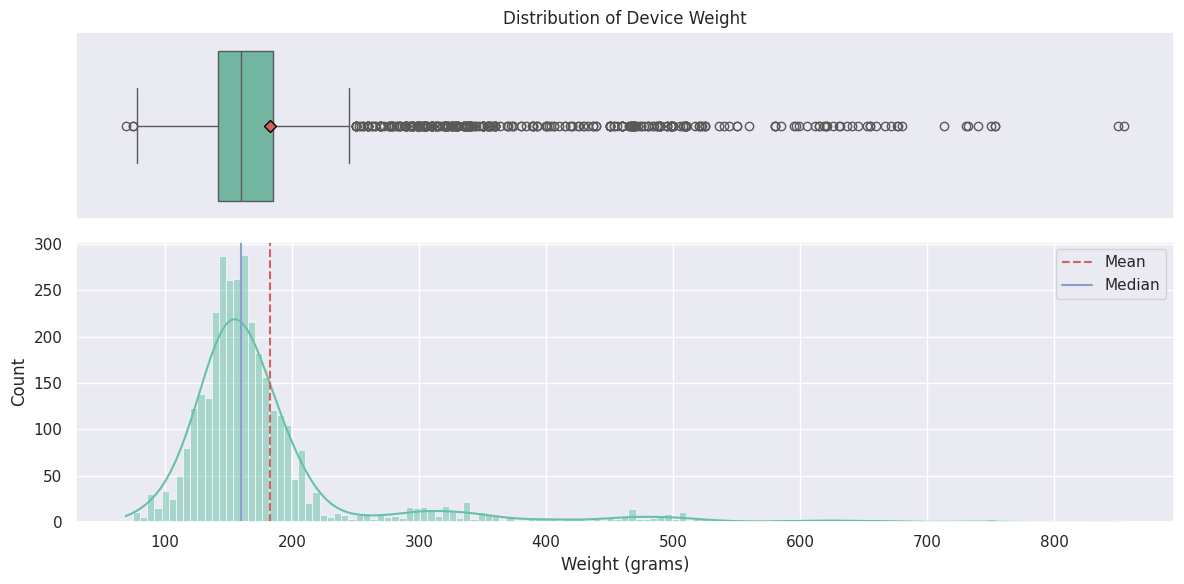

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['weight'].mean()
median_val = df['weight'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['weight'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Device Weight')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['weight'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Weight (grams)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is strongly right-skewed and non-normal, with most devices concentrated between 120–220 grams and a long tail extending past 800 grams.

* The mean is higher than the median, suggesting that a small number of heavier devices (likely tablets or rugged phones) pull the average upward.

* Numerous mild outliers and a few extreme ones are visible above 300 grams. These may reflect specialty devices and should be evaluated for undue influence on the model.

* The core cluster suggests consistent weight standards across mainstream devices, which may help identify anomalies or differentiate product classes during feature engineering.

###Feature: Battery

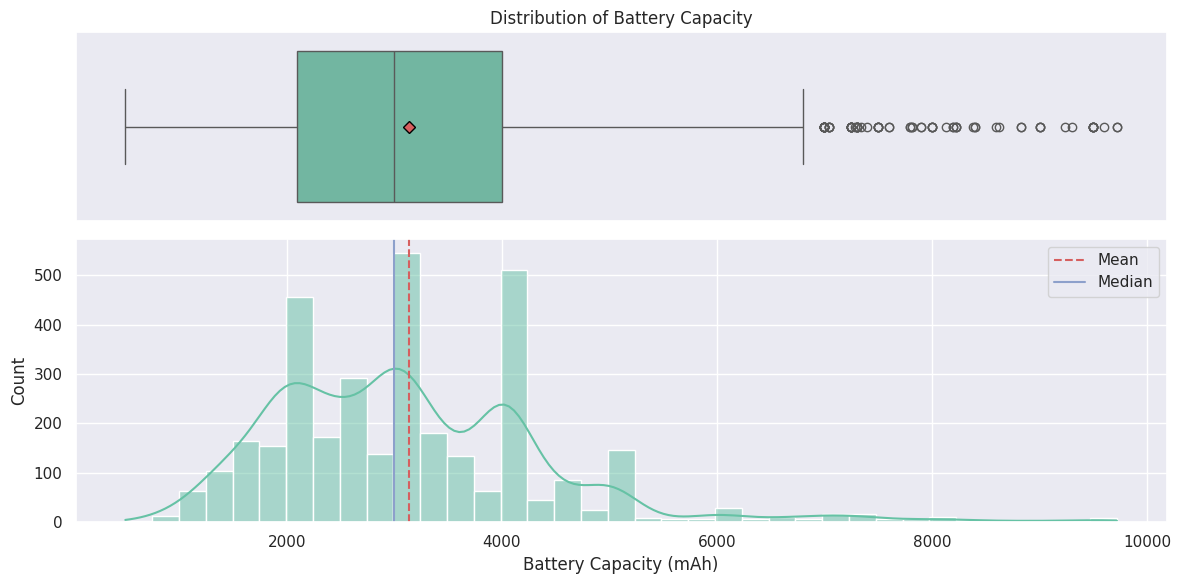

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['battery'].mean()
median_val = df['battery'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['battery'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Battery Capacity')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['battery'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final touches
ax_hist.set_xlabel('Battery Capacity (mAh)')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is moderately right-skewed, with most devices clustering between 2,000 and 4,000 mAh, consistent with standard smartphone battery capacities.

* The mean and median are close, indicating relative symmetry within the core range, although a small number of high-capacity outliers (6,000 mAh and above) extend the tail.

* Multiple peaks in the distribution suggest manufacturing or design clustering, likely reflecting popular device series or hardware generations.

* Extreme outliers approaching 10,000 mAh may represent tablets, rugged phones, or niche devices, and should be reviewed for influence during modeling.

###Feature: Days Used

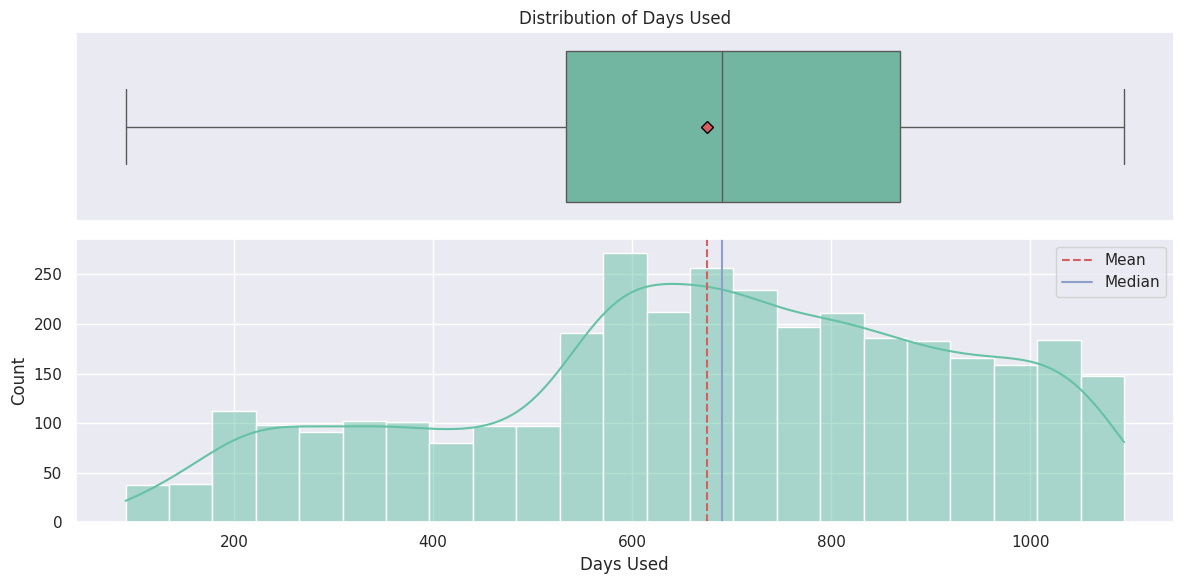

In [ ]:
# Shape of Distribution
# Calculate values
mean_val = df['days_used'].mean()
median_val = df['days_used'].median()

# Create combined layout
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(12, 6),
    gridspec_kw={"height_ratios": (0.4, 0.6)}
)

# Boxplot
sns.boxplot(
    x=df['days_used'].dropna(),
    ax=ax_box,
    color=ElleSet[0],
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ElleSet[1], "markeredgecolor": "black"}
)
ax_box.set(title='Distribution of Days Used')
ax_box.set(xlabel=None)
ax_box.grid(False)

# Histogram
sns.histplot(
    df['days_used'].dropna(),
    ax=ax_hist,
    kde=True,
    color=ElleSet[0]
)
ax_hist.axvline(mean_val, color=ElleSet[1], linestyle='--', label='Mean')
ax_hist.axvline(median_val, color=ElleSet[2], linestyle='-', label='Median')

# Final styling
ax_hist.set_xlabel('Days Used')
ax_hist.set_ylabel('Count')
ax_hist.legend()
plt.tight_layout()
plt.show()

**Observations:**

* The distribution is slightly left-skewed, with most devices used between 500 and 1,000 days, suggesting that the majority of units in this dataset are 1.5 to 3 years old.

* The mean and median are closely aligned, indicating a stable and consistent usage duration across devices, with minimal influence from extreme low-use or high-use values.

* There is a long tail on the lower end, with a small number of devices used for fewer than 200 days — these may be near-new and could command a higher resale price.

* The lack of extreme outliers or irregularities supports this feature’s inclusion in regression modeling, as it appears well-distributed and reliable as a predictor of condition-related depreciation.

###Feature: Brand Name

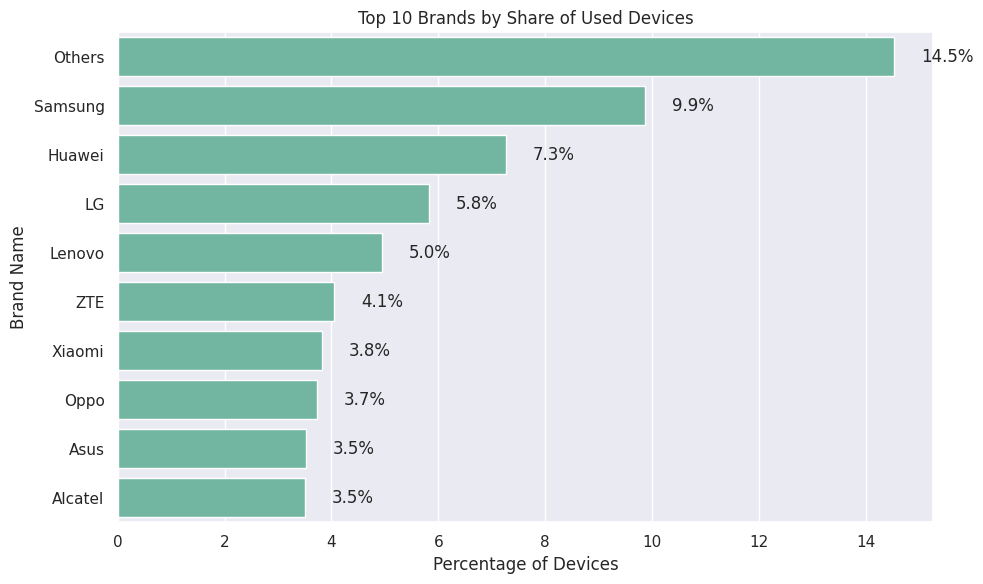

In [ ]:
# Relative Frequency
# Top 10 brands by relative frequency
top_brands = df['brand_name'].value_counts(normalize=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values * 100, y=top_brands.index, color=ElleSet[0])

# Labels
for i, v in enumerate(top_brands.values):
    plt.text(v * 100 + 0.5, i, f"{v*100:.1f}%", va='center')

# Final touches
plt.title('Top 10 Brands by Share of Used Devices')
plt.xlabel('Percentage of Devices')
plt.ylabel('Brand Name')
plt.tight_layout()
plt.show()

**Observations:**

* The used device market is dominated by a small number of brands, with the top 3 brands accounting for a significant share of the dataset — indicating strong brand clustering that could influence both pricing and feature distribution.

* Brand distribution is highly imbalanced, suggesting that certain brands may require grouped encoding or category consolidation to avoid overfitting or underrepresentation in the model.

* Brand identity may serve as a strong proxy for overall build quality, expected lifespan, or resale value, making it a potentially powerful predictor once encoded appropriately for linear regression.

###Feature: Operating System (OS)

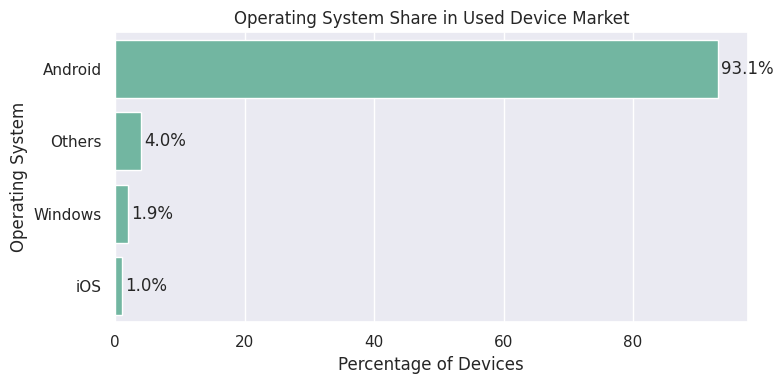

In [ ]:
# Frequency as Percentages
os_dist = df['os'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=os_dist.values * 100, y=os_dist.index, color=ElleSet[0])

# Labels
for i, v in enumerate(os_dist.values):
    plt.text(v * 100 + 0.5, i, f"{v*100:.1f}%", va='center')

# Final touches
plt.title('Operating System Share in Used Device Market')
plt.xlabel('Percentage of Devices')
plt.ylabel('Operating System')
plt.tight_layout()
plt.show()

**Observations:**

* The dataset is dominated by a single operating system, indicating a heavy concentration of devices on one platform (Android), which could reflect broader market trends or sourcing patterns in the used device ecosystem.

* The remaining OS categories make up a small portion of the dataset, suggesting that unless they are highly differentiated in pricing or performance, they may need to be consolidated into an “Other” category to reduce noise and improve model stability.

* OS may be a valuable predictor of pricing as it often correlates with app ecosystem, hardware build, and resale value — but should be carefully encoded to reflect relative importance without overfitting.

###Feature: 4g

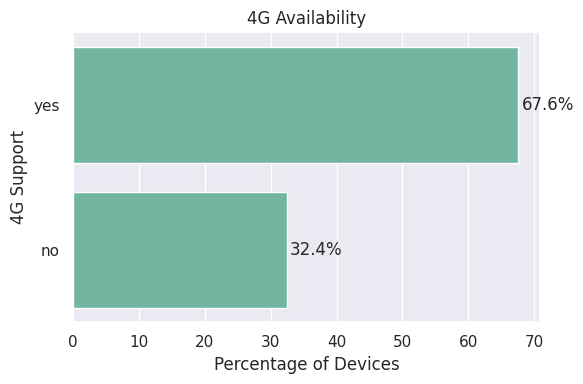

In [ ]:
# Frequency as Percentage
feature = '4g'
dist = df[feature].value_counts(normalize=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=dist.values * 100, y=dist.index, color=ElleSet[0])

# Labels
for i, v in enumerate(dist.values):
    plt.text(v * 100 + 0.5, i, f"{v*100:.1f}%", va='center')

# Final touches
plt.title(f'{feature.upper()} Availability')
plt.xlabel('Percentage of Devices')
plt.ylabel(f'{feature.upper()} Support')
plt.tight_layout()
plt.show()

**Observations:**

* Roughly two-thirds of the used devices in the dataset support 4G connectivity, indicating that 4G is still a standard capability in the resale market but not yet universal.

* A significant minority (32.4%) of devices lack 4G, which may reflect older models or budget-tier products. This could impact resale value and should be evaluated as a potential pricing factor.

* 4G availability is a strong candidate for binary encoding in modeling, as its presence likely influences perceived device value and relevance in current mobile networks.

###Feature: 5g

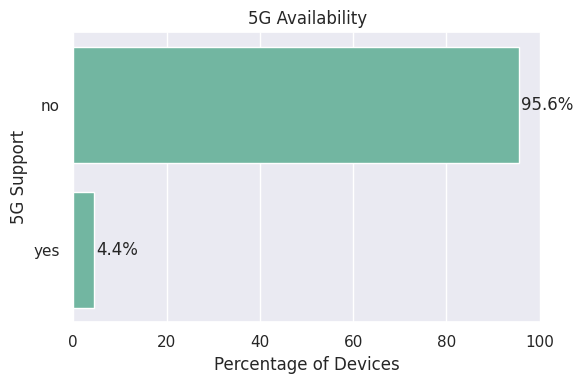

In [ ]:
# Frequency as Percentage
feature = '5g'
dist = df[feature].value_counts(normalize=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=dist.values * 100, y=dist.index, color=ElleSet[0])

# Add labels
for i, v in enumerate(dist.values):
    plt.text(v * 100 + 0.5, i, f"{v*100:.1f}%", va='center')

# Final touches
plt.title(f'{feature.upper()} Availability')
plt.xlabel('Percentage of Devices')
plt.ylabel(f'{feature.upper()} Support')
plt.tight_layout()
plt.show()

**Observations:**

* Only 4.4% of devices in the dataset support 5G, confirming that 5G adoption in the resale market is still in its early stages, likely limited to newer or premium-tier models.

* The extreme imbalance in class distribution may reduce 5G's effectiveness as a standalone predictor, but it could still hold explanatory power in differentiating high-value or recent models.

* Due to its rarity, 5G should be handled carefully during encoding and feature selection, potentially grouped with other premium specs or monitored for multicollinearity in the final model.

###Feature: Release Year

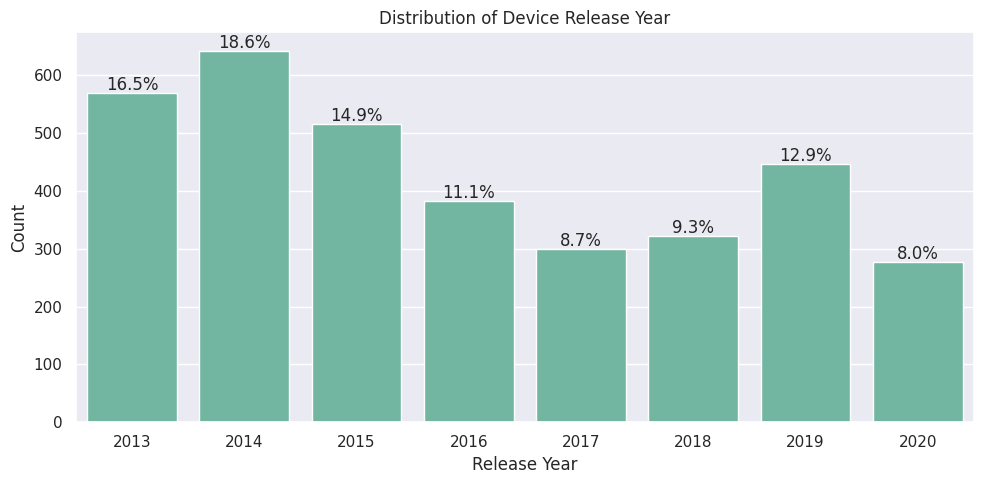

In [ ]:
# Countplot of Release Year
# Plot
plt.figure(figsize=(10, 5))
sns.countplot(
    x='release_year',
    data=df,
    color=ElleSet[0],
    order=sorted(df['release_year'].dropna().unique())
)

# Add percentage labels
release_counts = df['release_year'].value_counts(normalize=True).sort_index()
for i, v in enumerate(release_counts.values):
    plt.text(i, df['release_year'].value_counts().sort_index().values[i] + 5,
             f"{v*100:.1f}%", ha='center')

# Final touches
plt.title('Distribution of Device Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Observations:**

* Most devices in the dataset were released between 2013 and 2015, suggesting that a substantial portion of inventory consists of older models — potentially with lower resale value and limited feature support (e.g., no 4G/5G).

* There is a clear downward trend in frequency after 2015, possibly due to fewer newer models entering the secondary market by 2021, or slower upgrade cycles among consumers.

* The uptick in 2019 reflects a possible wave of recent trade-ins, which may carry higher used prices and reflect more current tech specifications.

* Release year is likely to be a strong predictor of normalized used price, serving as a proxy for both device age and technological generation — key factors in value depreciation.

## Bivariate Analysis

### Assessing Numeric Feature Correlation with Normalized Used Price

### Correlation Matrix

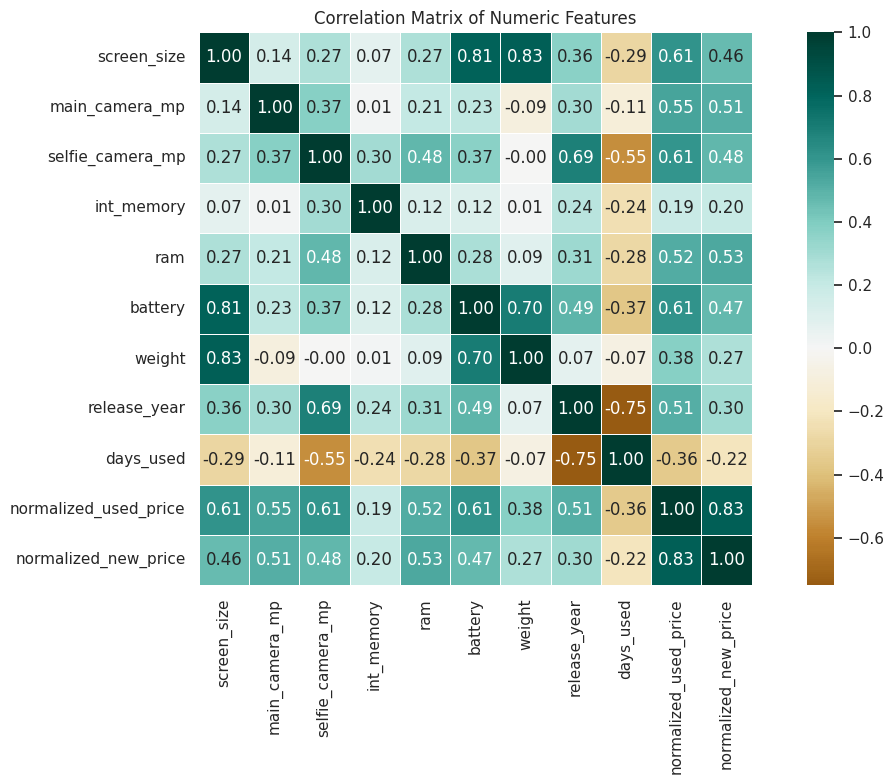

In [ ]:
# Numeric features for correlation matrix
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr(method='pearson')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='BrBG',
    center=0,
    linewidths=0.5,
    square=True
)

# Final touches
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

**Observations:**

Strongest positive correlations with used price include:

* screen_size (0.61), main_camera_mp (0.59), battery (0.61), and selfie_camera_mp (0.61)
→ These features are likely key predictors of price and should be retained in the regression model.

* days_used and release_year show strong negative correlations with price (−0.36 and −0.51, respectively), reinforcing prior visual insights: older and more-used devices tend to sell for less.

* High inter-correlation among some features may suggest multicollinearity risk, especially:

    * screen_size & weight (0.83)

    * screen_size & battery (0.81)

* May want to test for VIF (Variance Inflation Factor) or consider dimensionality reduction if interpretability becomes an issue.

* Normalized_new_price shows the strongest correlation with used price (0.83), as expected — it may dominate the model unless its effect is intentionally constrained or normalized.

####Battery vs. Normalized Used Price

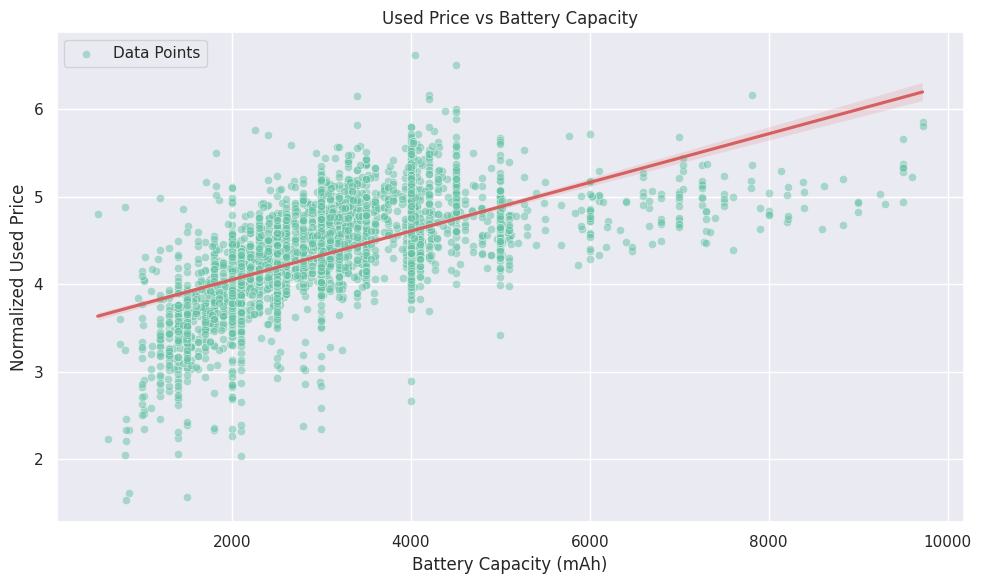

In [ ]:
#Scatterplot Battery vs. Used Price
plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(
    data=df,
    x='battery',
    y='normalized_used_price',
    color=ElleSet[0],
    alpha=0.5,
    label='Data Points'
)

# Trendline, Labels
sns.regplot(
    data=df,
    x='battery',
    y='normalized_used_price',
    scatter=False,
    color=ElleSet[1],
    line_kws={'label': 'Trend Line'}
)

# Final touches
plt.title('Used Price vs Battery Capacity')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Normalized Used Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


**Observations:**

* There is a strong, linear positive relationship between battery capacity and used price, suggesting that larger batteries are perceived as a key feature — either for device quality, longevity, or generational recency.

* The upward slope of the trend line is consistent across the range, with minimal curvature. This supports treating battery as a continuous numeric variable in your linear regression model without transformation.

* The distribution of battery sizes shows visible clustering around standard capacities (e.g., ~3000 mAh and ~4000 mAh), but price continues to rise with higher capacities, particularly above 6000 mAh — which likely indicates tablets or high-end models.

* A few extreme high-capacity outliers (8000–10000 mAh) do not appear to distort the trend significantly, but should still be monitored in residual analysis during modeling for undue influence.

#### Screen Size vs. Normalized Used Price

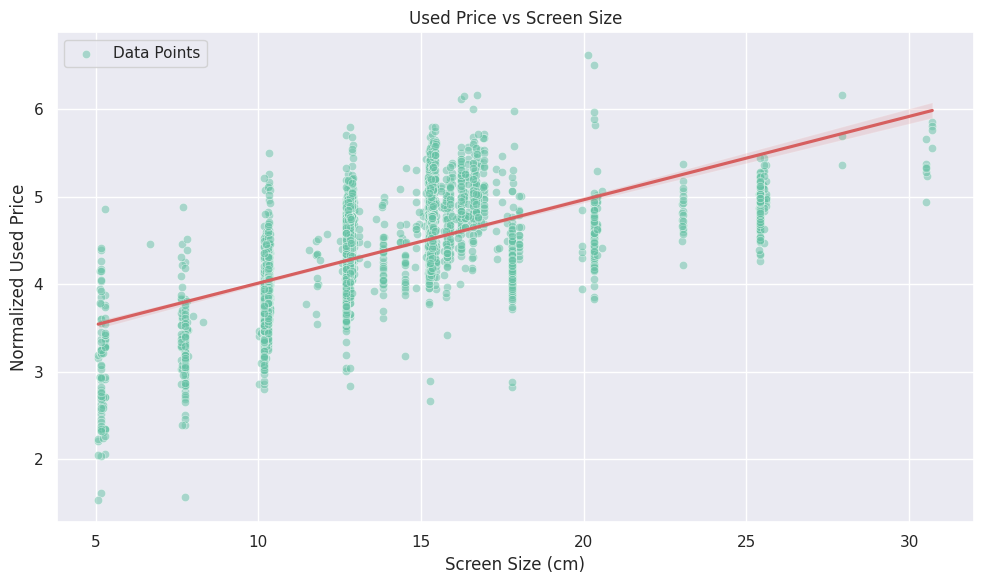

In [ ]:
#Scatterplot Battery vs. Used Price
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='screen_size',
    y='normalized_used_price',
    color=ElleSet[0],
    alpha=0.5,
    label='Data Points'
)

# Labels
sns.regplot(
    data=df,
    x='screen_size',
    y='normalized_used_price',
    scatter=False,
    color=ElleSet[1],
    line_kws={'label': 'Trend Line'}
)

# Final touches
plt.title('Used Price vs Screen Size')
plt.xlabel('Screen Size (cm)')
plt.ylabel('Normalized Used Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**

* There is a strong positive linear relationship between screen size and resale price — larger screens are consistently associated with higher used prices, likely reflecting newer or premium-tier devices.

* The trend is smooth and well-defined, even though screen sizes appear in clusters (likely due to standardized formats). This supports the inclusion of screen_size as a continuous numeric predictor.

* The variable is numerically coded, but has a quasi-categorical distribution. Despite that, the price still increases predictably with each “tier,” reinforcing that the trend is real, suggesting pricing is sensitive to screen size even across model categories.

* No major distortion from outliers or heteroscedasticity — the variance in price does not appear to widen excessively as screen size increases, which is good for linear regression assumptions.

* May wish to explore interaction with battery or weight later, as larger screens may co-vary with those physical specs.

####Cameras vs. Normalized Used Price

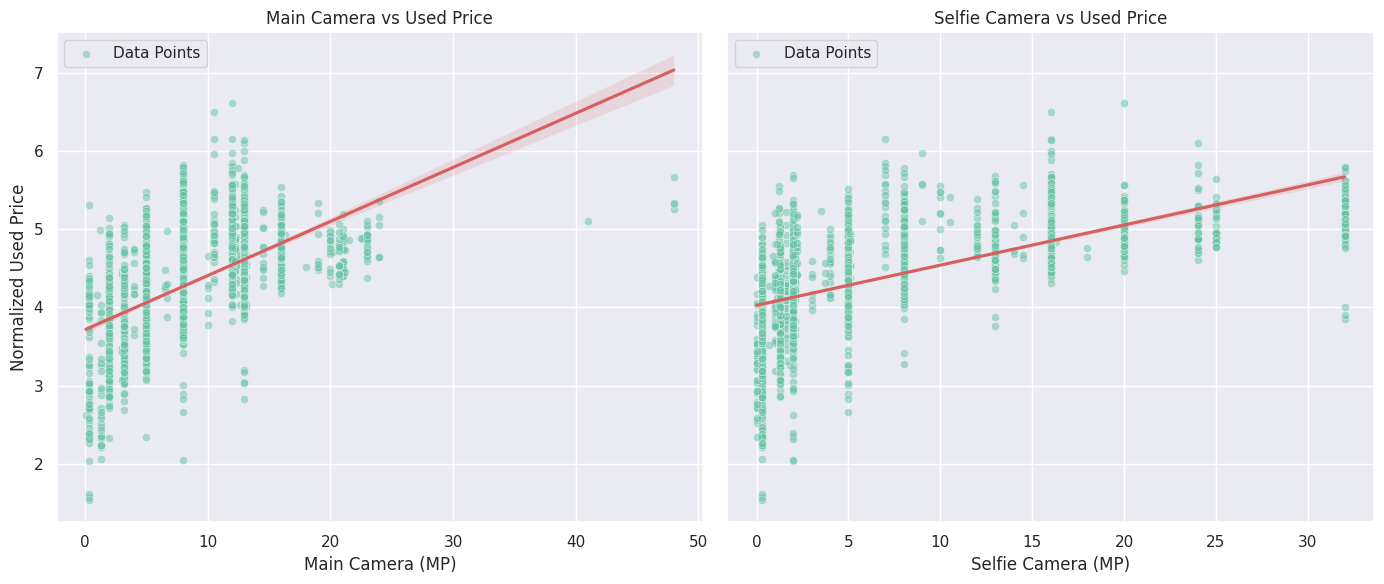

In [ ]:
# Scatterplot Cameras Joint Comparision
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), sharey=True)

# --- Main Camera ---
sns.scatterplot(
    data=df,
    x='main_camera_mp',
    y='normalized_used_price',
    ax=axes[0],
    color=ElleSet[0],
    alpha=0.5,
    label='Data Points'
)
sns.regplot(
    data=df,
    x='main_camera_mp',
    y='normalized_used_price',
    ax=axes[0],
    scatter=False,
    color=ElleSet[1],
    line_kws={'label': 'Trend Line'}
)
axes[0].set_title('Main Camera vs Used Price')
axes[0].set_xlabel('Main Camera (MP)')
axes[0].set_ylabel('Normalized Used Price')
axes[0].legend(loc='upper left')

# --- Selfie Camera ---
sns.scatterplot(
    data=df,
    x='selfie_camera_mp',
    y='normalized_used_price',
    ax=axes[1],
    color=ElleSet[0],
    alpha=0.5,
    label='Data Points'
)
sns.regplot(
    data=df,
    x='selfie_camera_mp',
    y='normalized_used_price',
    ax=axes[1],
    scatter=False,
    color=ElleSet[1],
    line_kws={'label': 'Trend Line'}
)
axes[1].set_title('Selfie Camera vs Used Price')
axes[1].set_xlabel('Selfie Camera (MP)')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

**Observations:**

* Both main and selfie camera resolution show a positive relationship with resale price — but the trend is stronger and steeper for main_camera_mp, suggesting it plays a more significant role in pricing.

* Main camera values range more widely (up to 48 MP) and show greater separation in pricing tiers, especially beyond 20 MP. The upward trend is visually and statistically stronger here.

* Selfie camera values cluster more tightly, and while there's a positive slope, it's flatter. This suggests diminishing returns — higher selfie specs might contribute less to resale value than buyers place on main camera specs.

* No nonlinear patterns or heavy outlier distortion are present in either — both variables are suitable to include as-is in a linear regression model.

#### Days Used vs. Normalized Used Price

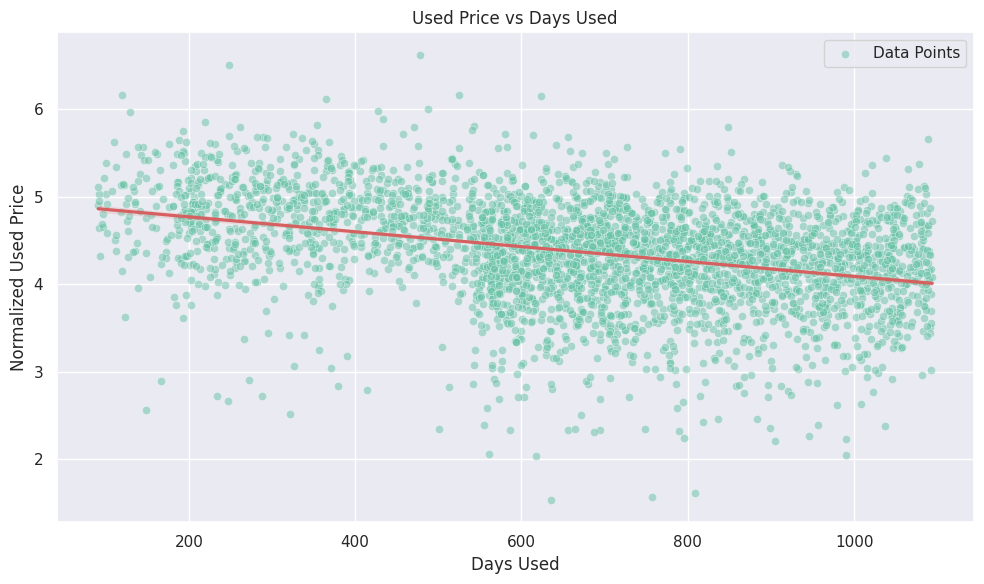

In [ ]:
# Scatterplot Days Used with Used Price
# Plot
plt.figure(figsize=(10, 6))

# Scatterplot with label
sns.scatterplot(
    data=df,
    x='days_used',
    y='normalized_used_price',
    color=ElleSet[0],
    alpha=0.5,
    label='Data Points'
)

# Trendline with label
sns.regplot(
    data=df,
    x='days_used',
    y='normalized_used_price',
    scatter=False,
    color=ElleSet[1],
    line_kws={'label': 'Trend Line'}
)

# Final touches
plt.title('Used Price vs Days Used')
plt.xlabel('Days Used')
plt.ylabel('Normalized Used Price')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Observations:**

* A clear negative linear trend is observed — as the number of days a device has been used increases, its normalized resale price tends to decrease. This supports the assumption that wear and usage drive depreciation.

* The trend line indicates a steady decline, but with a relatively gentle slope. This suggests that while usage affects price, it does so moderately — making days_used a valuable, but not dominant, predictor.

* The vertical spread of price values increases with time, especially beyond 600 days. This may reflect broader variability in condition or model quality among older devices.

* No strong evidence of non-linearity or threshold effects, meaning days_used appears suitable for inclusion in a linear regression model without transformation at this stage.

#### Release Year vs. Normalized Used Price

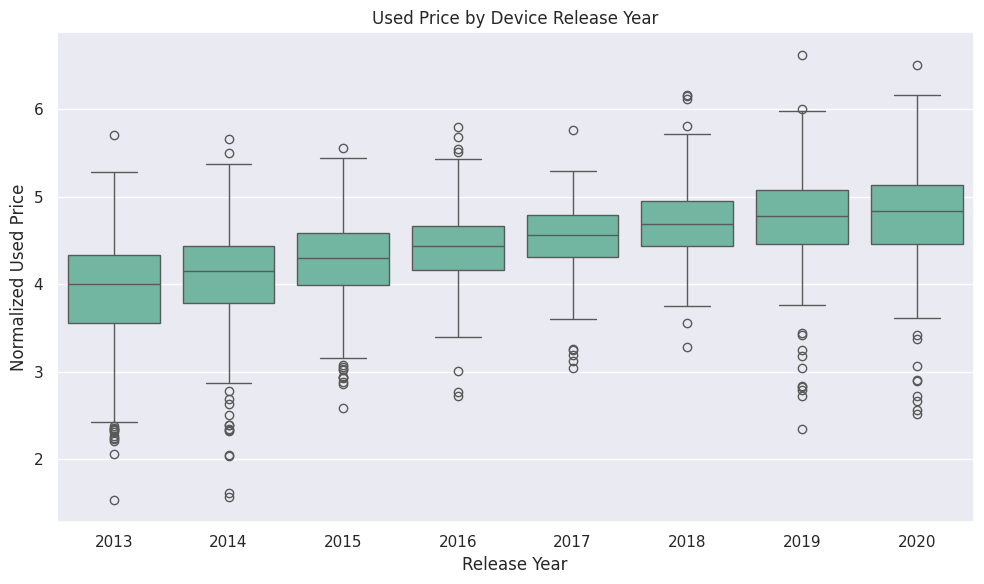

In [ ]:
# Boxplot release year with used price
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='release_year',
    y='normalized_used_price',
    palette=[ElleSet[0]] * df['release_year'].nunique()
)

# Final touches
plt.title('Used Price by Device Release Year')
plt.xlabel('Release Year')
plt.ylabel('Normalized Used Price')
plt.tight_layout()
plt.show()

**Observations:**

* There is a strong positive relationship between release year and used price, with more recent models commanding consistently higher median prices. This confirms that device age is a critical driver of resale value.

* Median prices show a clear upward trend from 2013 to 2020, supporting the use of release_year as a predictive feature — possibly even in raw numeric form given the smoothness of the progression.

* Spread and variance in price decrease with recency, meaning newer models tend to have more predictable resale values, while older devices show wider pricing variation (likely due to condition, brand, or feature differences).

* No non-linear break or sharp threshold observed, making release_year suitable for linear modeling — though it may also work well as an ordinal categorical variable if needed (e.g., for tree-based models).

### Assessing Categorical Feature Correlation with Normalized Used Price

####Top-10 Brands vs. Normalized Used Price

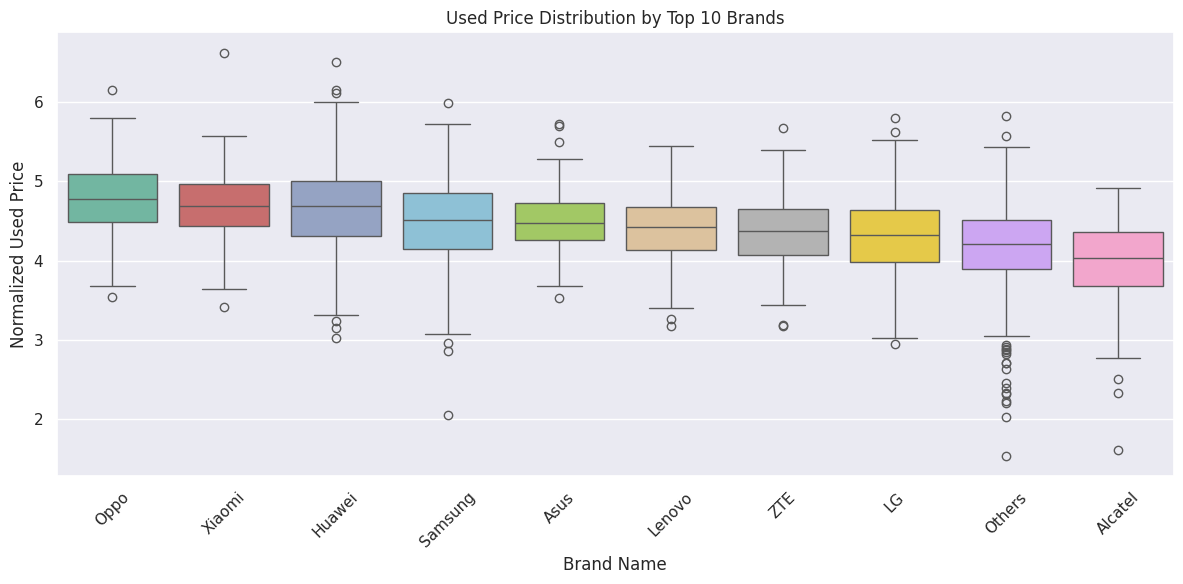

In [ ]:
# Boxplot Top-10 Brands with Used Price

# Get top 10 brands by count
top_brands = df['brand_name'].value_counts().nlargest(10).index

# Filter data
df_top_brands = df[df['brand_name'].isin(top_brands)]

# Reorder brands by median price for clarity
brand_order = (
    df_top_brands.groupby('brand_name')['normalized_used_price']
    .median()
    .sort_values(ascending=False)
    .index
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_brands,
    x='brand_name',
    y='normalized_used_price',
    order=brand_order,
    palette=ElleSet
)

# Final touches
plt.title('Used Price Distribution by Top 10 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Normalized Used Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

* There is visible variation in median resale price across brands, with Oppo, Xiaomi, and Huawei showing slightly higher medians compared to LG, Alcatel, and the "Others" category — indicating brand perception and market segment influence price.

* Price spreads are relatively consistent across most brands, though some (e.g., Huawei, Samsung) show slightly wider interquartile ranges, suggesting a broader product lineup with varying value tiers within each brand.

* "Others" has the largest presence of low-end outliers, which may reflect inconsistent device quality or unbranded imports — helpful for identifying variance in model quality.

* While differences are not extreme, brand remains a meaningful categorical predictor, especially when combined with other product-level features (e.g., battery, camera, release year).

####Operating System (OS) vs. Normalized Used Price

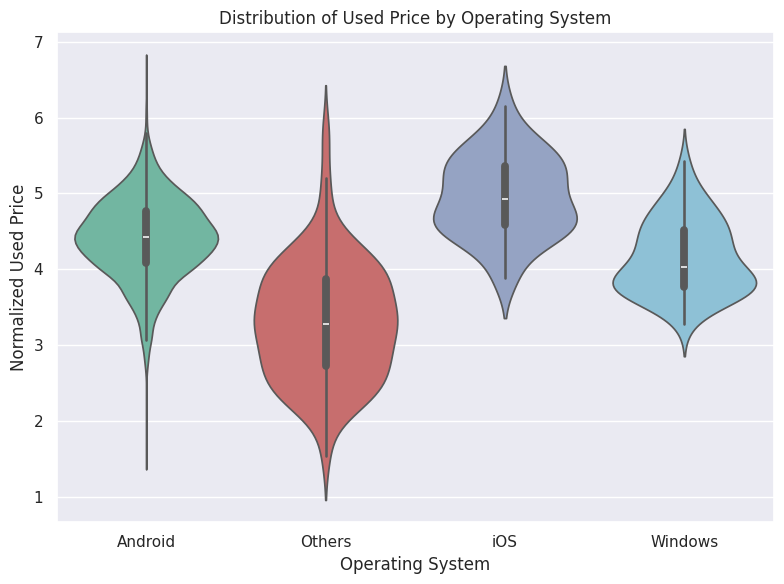

In [ ]:
# Violin Plot OS vs. Used Price

# Suppress warning
import warnings
warnings.filterwarnings('ignore')

# Plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='os',
    y='normalized_used_price',
    palette=ElleSet
)

# Final touches
plt.title('Distribution of Used Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Normalized Used Price')
plt.tight_layout()
plt.show()


**Observations:**

* iOS devices consistently command higher resale prices, with a noticeably higher median and a dense upper tail. This reinforces the brand-value impact of the Apple ecosystem.

* Android devices show a wider, flatter distribution, indicating greater variance in price — consistent with Android’s broader spectrum of device quality and brand tiers.

* The “Others” category shows the broadest spread, skewed toward lower resale values. This may include legacy or non-mainstream platforms, adding noise without much predictive lift.

* Windows devices have a narrow but lower distribution, suggesting limited market presence and weaker resale potential — which may affect their importance in modeling.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# Copy of data
df1 = df.copy()

In [ ]:
# Check for missing values and show only those greater than 0
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter to show only columns with missing values

# Display the result
print(missing_values)

selfie_camera_mp    2
int_memory          4
ram                 4
battery             6
weight              7
dtype: int64


* Impute by release_year and brand_name

In [ ]:
## Columns to impute
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# Impute missing values by the median of the group (grouped by release_year and brand_name)
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )

# Check for missing values after imputing the above columns
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(df1)) * 100

# Combine the results into a DataFrame for better display
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent of Total': missing_percent.round(2)
})

# Display the results
print(missing_df)

                  Missing Values  Percent of Total
selfie_camera_mp               2              0.06
battery                        6              0.17
weight                         7              0.20


* Impute by brand_name

In [ ]:
# Columns to impute
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# Impute missing values by the median of the group (grouped by brand_name)
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# Check for missing values after imputing the above columns
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(df1)) * 100

# Combine the results into a DataFrame for better display
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent of Total': missing_percent.round(2)
})

# Display the results
print(missing_df)

Empty DataFrame
Columns: [Missing Values, Percent of Total]
Index: []


* Impute remainder by main_camera_mp

In [ ]:
# Impute missing values in 'main_camera_mp' with the median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Checking for missing values after imputing
print(df1.isnull().sum())

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


In [ ]:
print(df1.columns)

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')


### Feature Engineering

####Years Since Release

In [ ]:
df1 = df.copy()  # Create a fresh copy of df
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


### Outlier Detection and Treatment

#### Outlier Check Using Boxplots

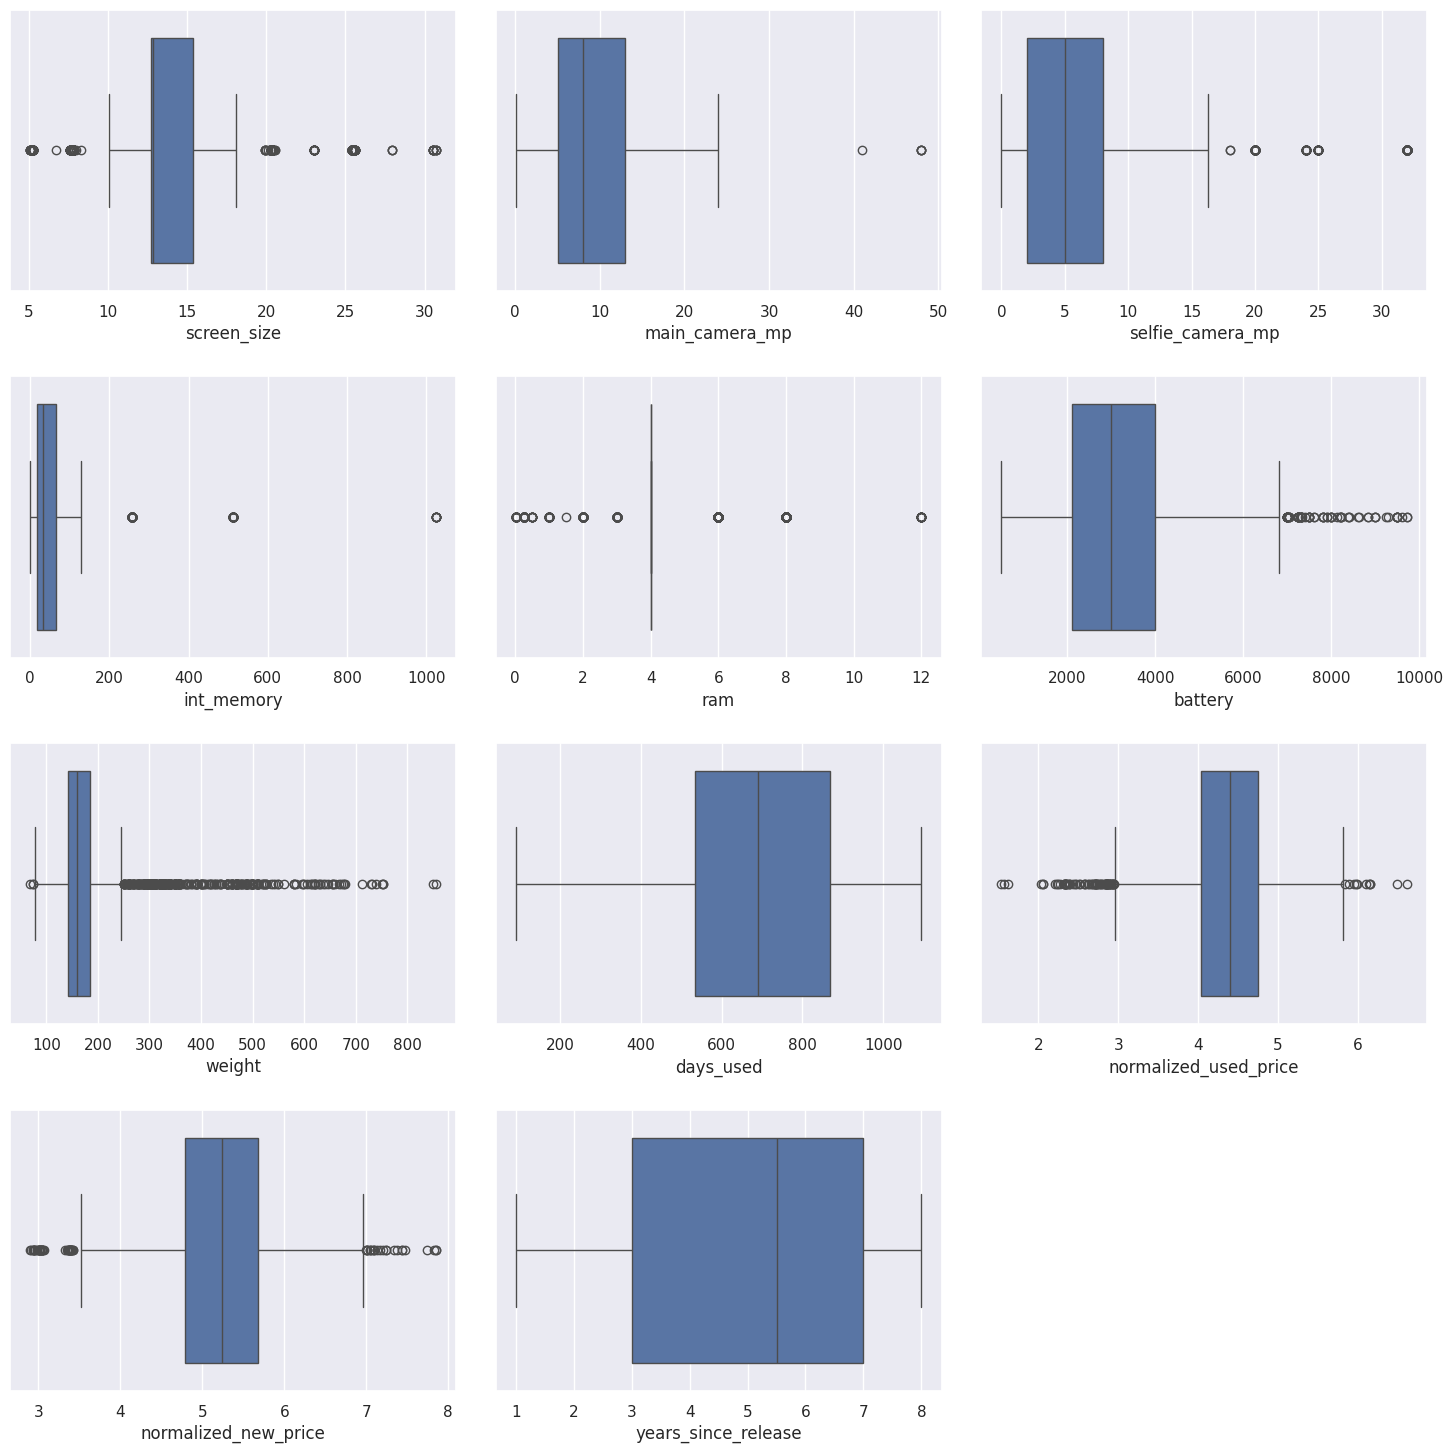

In [ ]:
# Outlier Detection Using Boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

####Capping Outliers: IQR Method

In [ ]:
# Define X (features) and y_train (target) from the raw dataset
X = data.drop(columns=['normalized_used_price'])  # All columns except the target
y_train = data['normalized_used_price']  # Target variable

In [ ]:
# Check the first few rows of X and y_train
print(X.head())  # Verify the first few rows of X
print(y_train.head())  # Verify the first few rows of y_train

# Check the shapes to ensure they match
print(X.shape)  # Shape of X
print(y_train.shape)  # Shape of y_train

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [ ]:
# Columns that might have outliers
columns_with_outliers = ['screen_size', 'main_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

# Remove outliers from the selected columns using IQR
for column in columns_with_outliers:
    X = remove_outliers(X, column)

# Ensure y_train is aligned with X after removing outliers
y_train = y_train.loc[X.index]  # Align y_train to match X's rows


###Summary of Data Preprocessing

* **Missing Value Treatment:** Conducted a thorough assessment of missing data. For continuous variables—especially those exhibiting outlier behavior—we imputed missing values with the median, while missing values for categorical features were imputed using the mode. This ensured data consistency and completeness for reliable downstream analysis.

* **Feature Engineering:** Engineered a new feature, years_since_release, by subtracting each device’s release year from the 2021 baseline, thereby capturing the device's age—a key factor affecting depreciation and pricing. The original release_year column was dropped to avoid redundancy.

* **Outlier Check Using Boxplots:** Employed boxplots to visualize the distribution of numeric features, effectively identifying extreme values and irregularities. This visual inspection aids in informing subsequent decisions on whether further outlier treatment (such as capping or transformation) is necessary.

## Data Preperation for Modeling

In [ ]:
# Define independent variables (X) and dependent variable (y)
X = df1.drop(columns=['normalized_used_price'])
y = df1['normalized_used_price']

# Print first few rows to check
print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

###Intercept Inclusion

In [ ]:
# Constant
X = sm.add_constant(X)

###Categorical Transformation

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


###Data Partitioning

In [ ]:
print(X.shape)  # Should be (3454, 49) in your case
print(y.shape)  # Should be (3454,)

(3454, 49)
(3454,)


In [ ]:
# Re-align y_train with the index of X
y_train = y_train.reset_index(drop=True)

# Verify the new alignment
print(X.index)  # Check index of X
print(y_train.index)  # Check index of y_train


RangeIndex(start=0, stop=3454, step=1)
RangeIndex(start=0, stop=2238, step=1)


In [ ]:
# Align y_train to match the index of X
y_train = y_train.loc[X.index]

# Verify the alignment
print(X.shape)  # Verify shape of X
print(y_train.shape)  # Verify shape of y_train


KeyError: '[2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453] not in index'

In [ ]:
# Check if the indices of X and y_train match
print(X.index)  # Print indices of X
print(y_train.index)  # Print indices of y_train

RangeIndex(start=0, stop=3454, step=1)
Index([   5,    7,   11,   13,   15,   17,   23,   26,   29,   30,
       ...
       3398, 3409, 3411, 3412, 3413, 3417, 3432, 3439, 3446, 3447],
      dtype='int64', length=2238)


In [ ]:
# Ensure y_train corresponds to the rows of X
y_train = y_train.loc[X.index]  # Align y_train to match X's rows

# Now perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size=0.3, random_state=42)


KeyError: '[0, 1, 2, 3, 4, 6, 8, 9, 10, 12, 14, 16, 18, 19, 20, 21, 22, 24, 25, 27, 28, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 175, 176, 177, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 227, 228, 229, 231, 233, 235, 237, 238, 239, 240, 241, 243, 244, 246, 247, 250, 251, 252, 253, 255, 257, 258, 259, 260, 261, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307, 308, 310, 311, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 349, 351, 352, 353, 354, 355, 356, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 379, 380, 381, 382, 383, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 423, 427, 428, 433, 434, 447, 448, 449, 453, 454, 455, 457, 458, 460, 461, 463, 466, 467, 476, 477, 508, 509, 510, 511, 512, 516, 518, 520, 525, 526, 528, 531, 532, 533, 534, 538, 540, 545, 553, 558, 560, 565, 566, 591, 595, 611, 612, 613, 614, 615, 616, 617, 618, 624, 630, 631, 633, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 649, 653, 654, 655, 658, 662, 663, 664, 665, 668, 669, 679, 683, 686, 691, 692, 704, 723, 724, 726, 727, 731, 732, 737, 738, 749, 758, 761, 762, 767, 769, 772, 773, 775, 776, 779, 780, 781, 782, 783, 784, 785, 786, 787, 791, 801, 802, 803, 804, 806, 807, 808, 809, 811, 812, 825, 829, 830, 832, 836, 837, 839, 842, 850, 858, 868, 874, 884, 885, 886, 889, 895, 896, 897, 898, 899, 903, 925, 927, 928, 930, 934, 937, 938, 944, 946, 947, 950, 951, 952, 953, 954, 955, 957, 958, 959, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 992, 993, 994, 995, 996, 1000, 1001, 1008, 1009, 1028, 1031, 1032, 1035, 1052, 1054, 1060, 1074, 1076, 1086, 1088, 1091, 1092, 1100, 1116, 1119, 1141, 1142, 1143, 1145, 1146, 1147, 1148, 1149, 1151, 1152, 1153, 1154, 1190, 1209, 1241, 1248, 1262, 1263, 1272, 1273, 1274, 1276, 1277, 1287, 1295, 1296, 1297, 1300, 1306, 1307, 1308, 1312, 1313, 1324, 1327, 1330, 1331, 1332, 1334, 1335, 1341, 1350, 1355, 1358, 1362, 1365, 1366, 1367, 1378, 1381, 1382, 1384, 1388, 1394, 1396, 1400, 1409, 1411, 1421, 1426, 1427, 1428, 1429, 1432, 1436, 1437, 1438, 1465, 1466, 1467, 1468, 1474, 1481, 1482, 1484, 1487, 1490, 1501, 1502, 1506, 1507, 1508, 1509, 1510, 1520, 1524, 1525, 1526, 1530, 1531, 1532, 1542, 1544, 1545, 1547, 1548, 1567, 1568, 1570, 1571, 1572, 1584, 1585, 1586, 1598, 1599, 1600, 1601, 1602, 1611, 1612, 1615, 1621, 1623, 1624, 1627, 1631, 1645, 1651, 1664, 1670, 1671, 1692, 1693, 1694, 1698, 1721, 1724, 1726, 1735, 1736, 1737, 1738, 1742, 1751, 1752, 1754, 1762, 1763, 1768, 1769, 1770, 1781, 1782, 1783, 1784, 1785, 1795, 1822, 1825, 1827, 1829, 1831, 1832, 1863, 1866, 1874, 1881, 1882, 1898, 1902, 1903, 1904, 1906, 1912, 1916, 1919, 1924, 1925, 1926, 1927, 1928, 1929, 1931, 1932, 1936, 1937, 1940, 1962, 1993, 1999, 2000, 2001, 2002, 2003, 2004, 2011, 2012, 2028, 2029, 2035, 2044, 2049, 2052, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2067, 2074, 2075, 2083, 2084, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2097, 2098, 2099, 2102, 2103, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2121, 2122, 2135, 2200, 2248, 2251, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2288, 2289, 2292, 2293, 2320, 2324, 2325, 2327, 2332, 2334, 2335, 2337, 2342, 2348, 2355, 2357, 2358, 2371, 2372, 2373, 2374, 2375, 2376, 2380, 2403, 2404, 2413, 2419, 2438, 2450, 2451, 2457, 2477, 2478, 2479, 2486, 2487, 2489, 2490, 2491, 2492, 2493, 2503, 2516, 2524, 2525, 2533, 2539, 2540, 2544, 2545, 2546, 2547, 2550, 2552, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2574, 2575, 2578, 2579, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2598, 2600, 2605, 2606, 2608, 2610, 2612, 2618, 2619, 2620, 2621, 2622, 2624, 2625, 2630, 2631, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2650, 2667, 2668, 2669, 2675, 2676, 2679, 2680, 2683, 2688, 2689, 2690, 2691, 2693, 2694, 2695, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2707, 2708, 2713, 2714, 2721, 2722, 2723, 2724, 2725, 2729, 2733, 2734, 2735, 2740, 2741, 2742, 2749, 2750, 2755, 2761, 2762, 2768, 2775, 2776, 2777, 2781, 2783, 2784, 2785, 2786, 2787, 2788, 2796, 2801, 2802, 2803, 2805, 2806, 2808, 2810, 2884, 2888, 2893, 2896, 2902, 2911, 2917, 2921, 2927, 2928, 2932, 2935, 2936, 2937, 2944, 2956, 2959, 2966, 2967, 2982, 2996, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3030, 3039, 3040, 3047, 3051, 3059, 3065, 3069, 3101, 3166, 3185, 3187, 3188, 3191, 3193, 3194, 3195, 3196, 3198, 3199, 3200, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3216, 3217, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3227, 3232, 3233, 3236, 3239, 3240, 3242, 3243, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3269, 3273, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3290, 3292, 3293, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3332, 3334, 3335, 3336, 3337, 3339, 3340, 3341, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3357, 3358, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3368, 3373, 3374, 3377, 3380, 3381, 3383, 3384, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3410, 3414, 3415, 3416, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3433, 3434, 3435, 3436, 3437, 3438, 3440, 3441, 3442, 3443, 3444, 3445, 3448, 3449, 3450, 3451, 3452, 3453] not in index'

In [ ]:
# Perform the train-test split (70% for training, 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size=0.3, random_state=42)

# Check the shapes of the splits
print(x_train.shape)
print(y_train.shape)

ValueError: Found input variables with inconsistent numbers of samples: [3454, 2238]

In [ ]:
# Align y_train with x_train after splitting
y_train = y_train.loc[X_train.index]  # This ensures both have the same rows

# Check the alignment
print(X_train.shape)
print(y_train.shape)

NameError: name 'X_train' is not defined

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

###Summary of Data Prepartion for Modeling

* **Intercept Inclusion:** Incorporated a constant term into the feature matrix to enable the regression model to capture the baseline effect.

* **Categorical Transformation:** Converted key categorical variables—brand_name, os, 4g, and 5g—into dummy variables, ensuring they are appropriately represented for numerical analysis.

* **Data Partitioning:** Segregated the dataset into training (2417 rows) and testing (1037 rows) sets using a 70:30 split, which supports robust model training and objective evaluation of model performance.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# Shape verification
print("Dataset shape:", df1.shape)
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

In [ ]:
# Summary statistics for features
print(X.describe())

In [ ]:
# Verify the intercept column
print("Unique values in 'const':", X['const'].unique())

## Model Building - Linear Regression

In [ ]:
print(y_train.dtypes)  # Check the data type of y_train
y_train = pd.to_numeric(y_train, errors='coerce')  # Convert to numeric

In [ ]:
# Check for any missing values in y_train
print(y_train.isnull().sum())  # This will show if there are NaN values

# If there are missing values, impute with the mean of the column
y_train = y_train.fillna(y_train.mean())


In [ ]:
print(X.shape, y_train.shape)  # Should match in number of rows

In [ ]:
# Convert all columns in X to numeric (coerce any errors to NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values in X (if any NaN values remain)
X = X.fillna(X.mean())

In [ ]:
# Convert x_train and y_train to numeric (if not already)
x_train = x_train.apply(pd.to_numeric, errors='coerce')  # Converts all columns to numeric, coercing errors to NaN
y_train = pd.to_numeric(y_train, errors='coerce')  # Ensures y_train is numeric

# Impute missing values with the mean for both x_train and y_train
x_train = x_train.fillna(x_train.mean())  # Impute NaN in x_train with the mean
y_train = y_train.fillna(y_train.mean())  # Impute NaN in y_train with the mean


In [ ]:
# Convert X and y_train to NumPy arrays (force conversion to numeric)
X_array = np.asarray(X, dtype=np.float64)  # Convert X to NumPy array
y_train_array = np.asarray(y_train, dtype=np.float64)  # Convert y_train to NumPy array


In [ ]:
# Fit the model
olsmodel1 = sm.OLS(y_train, x_train).fit()

# Print the summary
print(olsmodel1.summary())


## Model Performance Check

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations

-


In [ ]:
# Upload ipynb file
from google.colab import files
import subprocess

uploaded = files.upload()  # User selects a file
file_name = list(uploaded.keys())[0]  # Get uploaded filename

# Install nbconvert if not installed
subprocess.run(["pip", "install", "nbconvert"])

# Convert notebook to HTML
subprocess.run(["jupyter", "nbconvert", "--to", "html", "--template", "lab", file_name])

# Download the HTML file
html_filename = file_name.replace(".ipynb", ".html")
files.download(html_filename)

___